
| Nome        | nUSP           | 
| ------------- |:-------------:|
| Pedro Raul Taborga da Costa | 4537076 |
| Flavio de Figueiroa Teixeira Silva | 11270722|

**Conjunto de dados escolhido**:
Credit Card Fraud Detection (Disponível no [kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud))

**Conteúdo**:
O conjunto de dados contém 284.807 transações que ocorreram em dois dias de setembro de 2013, realizadas por pessoas na Europa. O conjunto é altamente desbalanceado, com apenas 0.172% de transações fraudulentas. 

**Atributos**:
Possui 28 atributos numéricos contínuos, derivados das variáveis originais por meio de análise de componentes principais, um atributo numérico que indica a ordem em que as transações ocorreram no tempo e outro atributo numérico com o valor original da transação, totalizando 30 atributos.

<details><summary><strong>Atributos detalhados</strong></summary>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 
</details>
<hr>

## Pré Processamento no conjunto de dados

In [3]:
import pandas as pd
df = pd.read_csv("../datasets/creditcardfraud.zip")
cols = df.columns.tolist()
reord = [cols.pop(0),cols.pop(-2),cols.pop(-1)]
cols = reord + cols
df = df[cols]
df.to_csv("creditcard.zip",compression="zip",index=False)


<AxesSubplot:title={'center':'Tipo de Transações'}>

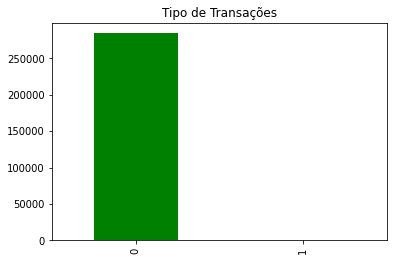

In [4]:
dfRen = df
dfRen["Class"].value_counts().plot(kind="bar", color={"green":"0","red":"1"}, title="Tipo de Transações")

## 2. Verificando se existem dados faltantes no conjunto de dados escolhido

In [5]:
qtdNulls = df.isnull().sum(axis = 0).rename("Qtd. de null")
qtdNulls

Time      0
Amount    0
Class     0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Name: Qtd. de null, dtype: int64

## Após rebalanceamento
Dentre as técnicas de rebalanceamento:

1. under sampling -> random
1. over sampling -> random, SMOTE (synthetic minority oversampling techinique)
1. hibrida -> SMOTE -> TOMEK 

Escolhemos utilizar random oversampling, visto que a perda de dados por undesampling se mostrou grande mais

if !funcionar:
Escolhemos utilizar random UNDERsampling, visto que utilizamos tanto undersampling como oversampling porém não houve uma diferença significativa no resultado dos algoritmos, só um aumento colossal no tempo de execução deles. 

<AxesSubplot:title={'center':'Tipo de Transações'}>

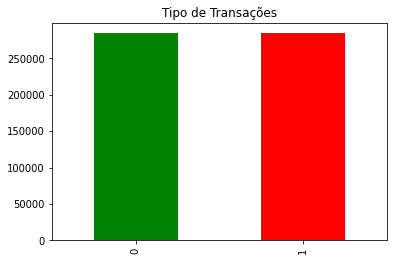

In [6]:
# Armazenando a quantidade de entradas de cada tipo de transação
count_legal, count_fraude = dfRen["Class"].value_counts()

# Separando o dataset em 2 dataframes, cada um contendo só um tipo de transação
df_legal = dfRen[dfRen["Class"] == 0].reset_index()
df_fraude = dfRen[dfRen["Class"] == 1].reset_index()

# Escolhe aleatoriamente o mesmo número que temos em fraudes dentre o total de transações legais
df_fraude_over = df_fraude.sample(count_legal, replace=True)

# Cria e exibe um dataframe a partir da junção dos 2, agora balanceados
df_balanced = pd.concat([df_legal,df_fraude_over], axis=0, ignore_index=True).drop(columns=["index"])
df_balanced["Class"].value_counts().plot(kind="bar",color={"green":"Legal","red":"Fraude"},title="Tipo de Transações")

## 4. Aplicar alguma técnica de normalização nos dados.

In [7]:
# Normalização por MinMaxScaler, onde os valores ficarão entre 0 e 1, que será útil para algoritmos de aprendizado
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_balanced)
df_norm = pd.DataFrame(df_mm, columns=cols)
df_norm

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.000000,0.005824,0.0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,...,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697
1,0.000000,0.000105,0.0,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,...,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423
2,0.000006,0.014739,0.0,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,...,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911
3,0.000006,0.004807,0.0,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,...,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371
4,0.000012,0.002724,0.0,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,...,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.239322,0.001328,1.0,0.703106,0.852464,0.554991,0.503047,0.685484,0.220321,0.175700,...,0.654609,0.569663,0.602185,0.471215,0.662670,0.440147,0.617037,0.434601,0.392315,0.298768
568626,0.238327,0.000443,1.0,0.833692,0.819603,0.690963,0.614313,0.716994,0.239064,0.195242,...,0.878666,0.587967,0.596199,0.511613,0.665224,0.466486,0.574910,0.452353,0.442556,0.319529
568627,0.103234,0.029830,1.0,0.870158,0.840778,0.603288,0.633954,0.690221,0.269779,0.207709,...,0.749392,0.573624,0.595108,0.545494,0.676079,0.295086,0.487138,0.453601,0.428077,0.309680
568628,0.593922,0.000295,1.0,0.886580,0.797553,0.735371,0.557400,0.742795,0.251413,0.218203,...,0.603186,0.577839,0.587604,0.583176,0.656850,0.374278,0.475231,0.413617,0.419035,0.300951


## 5. Calculando médias, medianas, variâncias, min, max

In [8]:
desc = df_norm.describe()
desc.drop(index=["count"], inplace=True)
desc.loc["median"] = df_norm.median(axis=0)
desc.reindex(["mean","median","std","min","max","25%","50%","75%"])

,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
mean,0.508442,0.004090,0.5,0.917849,0.786369,0.776532,0.352392,0.755115,0.255997,0.248415,...,0.589862,0.582226,0.567280,0.510288,0.665120,0.375219,0.579049,0.429672,0.418095,0.313889
median,0.465539,0.000738,0.5,0.945175,0.777418,0.813756,0.310203,0.762831,0.256499,0.261445,...,0.580635,0.580523,0.563870,0.511348,0.664944,0.383026,0.580751,0.422920,0.417415,0.313836
std,0.278700,0.009860,0.5,0.093889,0.039187,0.107868,0.141979,0.028419,0.017698,0.035688,...,0.099779,0.011802,0.045227,0.054748,0.017849,0.076036,0.037785,0.078091,0.018773,0.009192
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.266546,0.000054,0.0,0.909598,0.765741,0.748720,0.247177,0.753624,0.247189,0.246448,...,0.529769,0.578188,0.558738,0.484916,0.661880,0.328176,0.560100,0.378352,0.415343,0.311930
50%,0.465539,0.000738,0.5,0.945175,0.777418,0.813756,0.310203,0.762831,0.256499,0.261445,...,0.580635,0.580523,0.563870,0.511348,0.664944,0.383026,0.580751,0.422920,0.417415,0.313836
75%,0.779932,0.003892,1.0,0.976044,0.796901,0.843344,0.440022,0.768925,0.263795,0.266994,...,0.640046,0.584814,0.571974,0.536940,0.668292,0.432599,0.599919,0.478449,0.424906,0.317568


## Matriz de correlação

[['16', '17']]


<AxesSubplot:>

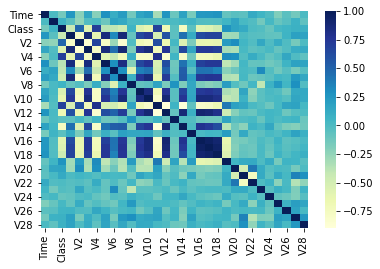

In [16]:
import seaborn as sns
corr_matrix = df_norm.corr()
selected = corr_matrix.applymap(lambda x : x > 0.95 and x != 1)
listaVars = []
for c in selected.columns:
    for index,values in selected[c].items():
        if values == True:
            numA = c.split("V")[1]
            numB = index.split("V")[1]
            if numB > numA:
                listaVars.append([numA,numB])
listaVars #Corresponde a dupla de atributos com uma correlação maior que 0.95

print(listaVars)
sns.heatmap(corr_matrix, cmap="YlGnBu")

## Gráficos para analisar os dados

In [10]:
# TODO: ????

## Exportando o conjunto de dados rebalanceado e normalizado

In [11]:
df_norm.to_csv("creditcard_norm.zip",compression="zip",index=False)